# INTRODUCTION

This notebook consists of code files on face detection using Viola-Jones
The notebook comprises of all the below using OOPs cocepts


* **SINGLE FACE DETECTION AND MULTIFACE DETECTION ON AN IMAGE**
* **SINGLE FACE DETECTION ON A VIDEO AND SAVE IT**
* **MULTI FACE DETECTION ON A VIDEO AND SAVE IT**



# IMPORT LIBRARIES

In [1]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#SINGLE FACE DETECTION AND MULTI FACE DETECTION ON AN IMAGE

[[50 67 90 90]
 [22 68 87 87]]
----------
2


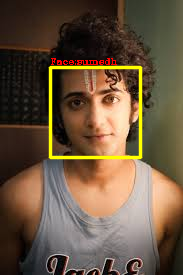

[[ 61  22  48  48]
 [139  39  35  35]
 [195  46  36  36]
 [278  42  33  33]
 [226  44  50  50]
 [105  71  44  44]
 [167  94  35  35]
 [201  96  42  42]]
----------
8


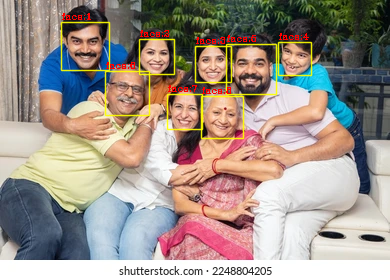

In [2]:
class voila_jones:

  def __init__(self,path):
    self.path=path
    self.Single_imagepath='/content/drive/MyDrive/VT/voila jones/face1.jpeg'
    self.Multi_Imagepath='/content/drive/MyDrive/VT/voila jones/faces.jpg'

    self.single_image=cv2.imread(self.Single_imagepath)
    self.multi_image=cv2.imread(self.Multi_Imagepath)

    self.haarcascade_file='/content/drive/MyDrive/VT/voila jones/haarcascade_frontalface_default.xml'
    self.model=cv2.CascadeClassifier(self.haarcascade_file)

  def DetectSingle(self):
    try:

      co_ordinates,length=self.model.detectMultiScale2(self.single_image)
      print(co_ordinates)
      print('----------')
      print(len(length))

      cor=co_ordinates[0]
      x1,y1,x2,y2=cor[0],cor[1],cor[2],cor[3]
      cv2.rectangle(self.single_image,(x1,y1),((x2+x1),(y2+y1)),(0,255,255),2,cv2.LINE_AA)
      cv2.putText(self.single_image,'Face:sumedh',(x1,y1-3), cv2.FONT_HERSHEY_COMPLEX,0.3,(0,0,255),1)

      cv2_imshow(self.single_image)
      #we can also save the detected image in a path using
      #cv2.imwrite('/content/drive/MyDrive/VT/voila jones/sumedh-face-detected.jpg',self.single_image)
      cv2.waitKey()
      cv2.destroyAllWindows()
    except Exception as e :
      print('error in detect_single',e)

  def DetectMulti(self):
    try:
      co_ordinates,length=self.model.detectMultiScale2(self.multi_image)
      print(co_ordinates)
      print('----------')
      print(len(length))
      count=1
      for i in range(len(length)):
        cor=co_ordinates[i]
        x1,y1,x2,y2=cor[0],cor[1],cor[2],cor[3]
        cv2.rectangle(self.multi_image,(x1,y1),((x2+x1),(y2+y1)),(0,255,255),1,cv2.LINE_AA)
        text='face:'+str(count)
        cv2.putText(self.multi_image,text,(x1,y1-3), cv2.FONT_HERSHEY_COMPLEX,0.3,(0,0,255),1)
        count += 1
      cv2_imshow(self.multi_image)
      cv2.waitKey()
      cv2.destroyAllWindows()
    except Exception as e :
      print('error in detect_multi',e)


if __name__ == '__main__':
    try:
        # Create an instance of the voila_jones class
        obj = voila_jones('/content/drive/MyDrive/VT/voila jones/face1.jpeg')
        obj2= voila_jones('/content/drive/MyDrive/VT/voila jones/faces.jpg')

        # Call the DetectSingle() method on the instance
        obj.DetectSingle()
        obj2.DetectMulti()
    except Exception as e:
        print(f'error in main =', e)

# SINGLE FACE DETECTION ON A VIDEO

In [3]:
class Voila:
    def __init__(self, cap):
        self.vid = '/content/drive/MyDrive/VT/voila jones/singleface.mp4'
        self.model= cv2.CascadeClassifier(
            '/content/drive/MyDrive/VT/voila jones/haarcascade_frontalface_default.xml')
        self.cap = cv2.VideoCapture(self.vid)
        self.result=cv2.VideoWriter("obamaFD.avi",cv2.VideoWriter_fourcc(*'XVID'), 10, (520,520))

    def voilavideo(self):
        try:
            while self.cap.isOpened():
                res, frames = self.cap.read()
                #print(f'The shape of the frame : {frames.shape}')
                if res == True:
                    # image is to big we can resize
                    frames = cv2.resize(frames, (520, 520))
                    co_ordinates, faces = self.model.detectMultiScale2(frames)
                    #print(f'the cordinates : {co_ordinates}')
                    count=1
                    if len(co_ordinates) > 0:
                        cor = co_ordinates[0]
                        for i in range(len(cor)):
                            x1, y1, x2, y2 = cor[0], cor[1], cor[2], cor[3]
                            cv2.rectangle(frames, (x1, y1), (x2 + x1, y2 + y1), (0, 0, 255),2)  # here box is detected on face
                            text = 'face'
                            cv2.putText(frames, text, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                            #cv2_imshow( frames)
                            count += 1
                    else:
                        pass
                    self.result.write(frames)
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
                else:
                    break
            self.cap.release()
            cv2.destroyAllWindows()
        except Exception as e:
            print('error in detect_video', e)


if __name__=='__main__':
    try:
        # Create an instance of the voila_jones class
        obj = Voila("/content/drive/MyDrive/VT/voila jones/singleface.mp4")
        # Call the voilavideo() method on the instance
        obj.voilavideo()
    except Exception as e:
        print(f'error in main =',e)



# MULTI FACE DETECTION ON A VIDEO -VIDEO 1

In [4]:
class Voila:
    def __init__(self, cap):
        self.vid = '/content/drive/MyDrive/VT/voila jones/multifaces.mp4'
        self.model= cv2.CascadeClassifier(
            '/content/drive/MyDrive/VT/voila jones/haarcascade_frontalface_default.xml')
        self.cap = cv2.VideoCapture(self.vid)
        self.result=cv2.VideoWriter("Manyfaces.avi",cv2.VideoWriter_fourcc(*'XVID'), 5, (1280,720))

    def voilavideo(self):
        try:
            while self.cap.isOpened():
                res, frames = self.cap.read()
                #print(f'The shape of the frame : {frames.shape}')
                if res == True:
                    # image is to big we can resize
                    frames = cv2.resize(frames, (1280, 720))
                    co_ordinates, faces = self.model.detectMultiScale2(frames)
                    #print(f'the cordinates : {co_ordinates}')
                    if len(co_ordinates) > 0:
                        cor = co_ordinates[0]
                        for i in range(len(cor)):
                            x1, y1, x2, y2 = cor[0], cor[1], cor[2], cor[3]
                            cv2.rectangle(frames, (x1, y1), (x2 + x1, y2 + y1), (0, 0, 255),2)  # here box is detected on face
                            text = f'face{i}'
                            cv2.putText(frames, text, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                            #cv2_imshow( frames)
                    else:
                        pass
                    self.result.write(frames)
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
                else:
                    break
            self.cap.release()
            cv2.destroyAllWindows()
        except Exception as e:
            print('error in detect_video', e)


if __name__=='__main__':
    try:
        # Create an instance of the voila_jones class
        obj = Voila("/content/drive/MyDrive/VT/voila jones/multifaces.mp4")
        # Call the voilavideo() method on the instance
        obj.voilavideo()
    except Exception as e:
        print(f'error in main =',e)



#  MULTI FACE DETECTION ON A VIDEO -VIDEO 2

In [5]:
class Voila:
    def __init__(self, cap):
        self.vid = '/content/drive/MyDrive/VT/voila jones/onedirection.mp4'
        self.model= cv2.CascadeClassifier(
            '/content/drive/MyDrive/VT/voila jones/haarcascade_frontalface_default.xml')
        self.cap = cv2.VideoCapture(self.vid)
        self.result=cv2.VideoWriter("faceOnedirection.avi",cv2.VideoWriter_fourcc(*'XVID'), 50, (1280,720))

    def voilavideo(self):
        try:
            while self.cap.isOpened():
                res, frames = self.cap.read()
                #print(f'The shape of the frame : {frames.shape}')
                if res == True:
                    # image is to big we can resize
                    frames = cv2.resize(frames, (1280, 720))
                    co_ordinates, faces = self.model.detectMultiScale2(frames)
                    #print(f'the cordinates : {co_ordinates}')
                    if len(co_ordinates) > 0:
                        cor = co_ordinates[0]
                        for i in range(len(cor)):
                            x1, y1, x2, y2 = cor[0], cor[1], cor[2], cor[3]
                            cv2.rectangle(frames, (x1, y1), (x2 + x1, y2 + y1), (0, 0, 255),2)  # here box is detected on face
                            text = f'face{i}'
                            cv2.putText(frames, text, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                            #cv2_imshow( frames)
                    else:
                        pass
                    self.result.write(frames)
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
                else:
                    break
            self.cap.release()
            cv2.destroyAllWindows()
        except Exception as e:
            print('error in detect_video', e)


if __name__=='__main__':
    try:
        # Create an instance of the voila_jones class
        obj = Voila("/content/drive/MyDrive/VT/voila jones/onedirection.mp4")
        # Call the voilavideo() method on the instance
        obj.voilavideo()
    except Exception as e:
        print(f'error in main =',e)

